<a href="https://colab.research.google.com/github/Fijiman001/EGR-Empirical-Project/blob/main/Econometrics/df_final_and_test_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_csv('merging_done_6.csv')
df.drop(columns=['Company + Kupon and Maturity'], inplace=True)
print(df)

                        Name Clean_Company_Maturity     WKN  \
0       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
1       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
2       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
3       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
4       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
...                      ...                    ...     ...   
12622  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   
12623  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   
12624  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   
12625  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   
12626  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   

                                                     URL          ISIN  \
0      https://www.boerse-frankfurt.de/anleihe/xs2103...  xs2103014291   
1      https://www.boerse-frankfurt.de/anleihe/xs2103...  xs2103014291   
2      https://www.bo

We do some last data cleaning, removing rows with bad data and rows were prices seem wrong, e.g. last price = 1000

In [11]:
max_last_price = df['Last Price'].max()
max_last_price_row = df[df['Last Price'] == max_last_price]
print(max_last_price_row.count())
df.drop(df[df['Last Price'] == max_last_price].index, inplace=True)

Name                      21
Clean_Company_Maturity    21
WKN                       21
URL                       21
ISIN                      21
Company                   21
Kupon_Maturity            21
Coupon                    21
Maturity_Start            21
Maturity_End              21
is_green                  21
Last Price                21
DateTime                  21
Volume in Euro            21
+/- %                     21
Currency                  21
YTM                       21
dtype: int64


we also interestingly have a good mix of currencies

In [12]:
df['Currency'].unique()

array(['Euro', 'US-Dollar', 'Canadische Dollar', 'Real (Brasilien)',
       'Zloty (Polen)', 'Kolumbianische Pesos', 'Britische Pfund',
       'Neuseeland-Dollar', 'Norwegische Kronen', 'Ungarische Forint',
       'Südafrikanische Rand', 'Australische Dollar', 'Türkische Lira'],
      dtype=object)

# Last merge with additional static data for exact maturity date

In [13]:
df_universe = pd.read_csv('bond_universe_cleaned_1.csv')
print(df_universe.columns)
print(df_universe)

Index(['URL', 'ISIN', 'Company', 'Kupon_Maturity', 'Coupon', 'Maturity_Start',
       'Maturity_End', 'is_green', 'Letzter Preis', 'Veränderung zum Vortag',
       'Letzter Handel', 'Geld', 'Brief', 'Modified Duration', 'Kupon',
       'Emittent', 'Branche', 'Fälligkeit', 'Schuldnerkündigungsart',
       'Sonderkündigung', 'Nachrangig', 'Kleinste handelbare Einheit',
       'Spezialist', 'Handelsmodell', 'Emissionsdatum', 'Emissionsvolumen',
       'Umlaufendes Volumen', 'Emissionswährung', 'Depotwährung',
       'Notierungsaufnahme', 'Emission_year_2020.0', 'Emission_year_2021.0',
       'Emission_year_2022.0', 'Emission_year_2023.0', 'Emission_year_2024.0',
       'Emission_year_2025.0'],
      dtype='object')
                                                    URL          ISIN  \
0     https://www.boerse-frankfurt.de/anleihe/xs2694...  xs2694874533   
1     https://www.boerse-frankfurt.de/anleihe/xs2482...  xs2482887879   
2     https://www.boerse-frankfurt.de/anleihe/xs2482...  xs

In [14]:
# Columns to keep
columns_to_keep = ['ISIN', 'Modified Duration', 'Kupon',
                   'Emittent', 'Branche', 'Fälligkeit', 'Schuldnerkündigungsart',
                   'Sonderkündigung', 'Nachrangig', 'Kleinste handelbare Einheit',
                   'Spezialist', 'Handelsmodell', 'Emissionsdatum', 'Emissionsvolumen',
                   'Umlaufendes Volumen', 'Emissionswährung', 'Depotwährung',
                   'Notierungsaufnahme', 'Emission_year_2020.0', 'Emission_year_2021.0',
                   'Emission_year_2022.0', 'Emission_year_2023.0', 'Emission_year_2024.0',
                   'Emission_year_2025.0']

df_universe_selected = df_universe[columns_to_keep]  # Select only the necessary columns

# check ISINs
print(df_universe["ISIN"].value_counts())
df_universe_selected = df_universe[columns_to_keep].drop_duplicates(subset=["ISIN"])
# Merge
df_merged = df.merge(df_universe_selected, on="ISIN", how="left")
df_merged.drop_duplicates(inplace=True)
print(df_merged)

print(f"Original df rows: {df.shape[0]}")
print(f"Merged df rows: {df_merged.shape[0]}")

ISIN
xs2240978085    4
be6327721237    4
de000a3e5fr9    4
de000a289qr9    4
xs2553554812    4
               ..
xs2703618541    1
de000blb6jp7    1
de000blb6jq5    1
de000blb6jr3    1
usn30706vf42    1
Name: count, Length: 3607, dtype: int64
                        Name Clean_Company_Maturity     WKN  \
0       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
1       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
2       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
3       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
4       E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
...                      ...                    ...     ...   
12601  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   
12602  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   
12603  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   
12604  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   
12605  Talanx AG 1,75% 21/42   talanx ag 1 75 21 42  TLX310   



we calculate the YTM for rows that do not have an entry

In [15]:
print(df_merged['Fälligkeit'].head())
print(df_merged['Emissionsdatum'].head())
print(df_merged['DateTime'].head())

0    29,09,2027
1    29,09,2027
2    29,09,2027
3    29,09,2027
4    29,09,2027
Name: Fälligkeit, dtype: object
0    2020-01-16
1    2020-01-16
2    2020-01-16
3    2020-01-16
4    2020-01-16
Name: Emissionsdatum, dtype: object
0    2025-01-02T08:40:00Z
1    2025-01-02T10:53:00Z
2    2025-01-02T13:47:00Z
3    2025-01-03T08:40:00Z
4    2025-01-03T11:30:00Z
Name: DateTime, dtype: object


In [16]:
# Ensure DateTime is parsed, remove timezone and normalize (set time to midnight)
df_merged["Date"] = pd.to_datetime(df_merged["DateTime"]).dt.tz_convert(None).dt.normalize()

# Convert 'Fälligkeit' to datetime using the format provided (tz-naive by default)
df_merged['fälligkeit_datum'] = pd.to_datetime(df_merged['Fälligkeit'], format='%d,%m,%Y')

# Convert 'Emissionsdatum' to datetime (if needed later)
df_merged['emission_datum'] = pd.to_datetime(df_merged['Emissionsdatum'], format='%Y-%m-%d')

# Calculate the exact number of days until maturity
df_merged['days_to_maturity'] = (df_merged['fälligkeit_datum'] - df_merged["Date"]).dt.days

# Face Value assumption (usually 100)
F = 100

# Calculate YTM using the exact days to maturity (converted to years)
def calculate_ytm(row):
    if row["YTM"] == "-":
        P = row["Last Price"]
        C = row["Coupon"]  # Annual coupon payment (assumed to be in percent of F)
        T_years = row["days_to_maturity"] / 365.0  # convert days to years
        if T_years <= 0:
            return None  # handle bonds that have matured or if there's an error
        # YTM approximation formula: (Coupon + (Face Value - Price)/T) / ((Face Value + Price)/2)
        ytm = (C + (F - P) / T_years) / ((F + P) / 2) * 100  # multiplied by 100 to get percentage
        return round(ytm, 4)
    return row["YTM"]

df_merged["YTM"] = df_merged.apply(calculate_ytm, axis=1)

# Display the relevant columns for verification
print(df_merged[["DateTime", "Date", "Last Price", "days_to_maturity", "YTM"]])

                   DateTime       Date  Last Price  days_to_maturity   YTM
0      2025-01-02T08:40:00Z 2025-01-02       94.47            1000.0  2.46
1      2025-01-02T10:53:00Z 2025-01-02       94.37            1000.0   2.5
2      2025-01-02T13:47:00Z 2025-01-02       94.44            1000.0  2.47
3      2025-01-03T08:40:00Z 2025-01-03       94.35             999.0  2.51
4      2025-01-03T11:30:00Z 2025-01-03       94.24             999.0  2.55
...                     ...        ...         ...               ...   ...
12601  2025-01-31T08:15:00Z 2025-01-31       86.17               NaN   NaN
12602  2025-01-31T10:00:00Z 2025-01-31       86.27               NaN   NaN
12603  2025-01-31T14:00:00Z 2025-01-31       86.60               NaN   NaN
12604  2025-01-31T15:00:00Z 2025-01-31       86.59               NaN   NaN
12605  2025-01-31T16:00:00Z 2025-01-31       86.69               NaN   NaN

[12606 rows x 5 columns]


In [23]:
# removing rows if column "days_to_maturity" is empty
df_merged = df_merged.dropna(subset=['days_to_maturity']).reset_index(drop=True)
df_merged.to_csv('df_final_7.csv', index=False)

# Matching

In [26]:
url = "https://raw.githubusercontent.com/Fijiman001/EGR-Empirical-Project/refs/heads/main/data/Final%20data%20for%20the%20study/df_final_7.csv"
df = pd.read_csv(url)
print(df.head())
print(df.columns)

                   Name Clean_Company_Maturity     WKN  \
0  E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
1  E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
2  E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
3  E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   
4  E.ON SE 0,375% 20/27    e on se 0 375 20 27  A254QR   

                                                 URL          ISIN  Company  \
0  https://www.boerse-frankfurt.de/anleihe/xs2103...  xs2103014291  e on se   
1  https://www.boerse-frankfurt.de/anleihe/xs2103...  xs2103014291  e on se   
2  https://www.boerse-frankfurt.de/anleihe/xs2103...  xs2103014291  e on se   
3  https://www.boerse-frankfurt.de/anleihe/xs2103...  xs2103014291  e on se   
4  https://www.boerse-frankfurt.de/anleihe/xs2103...  xs2103014291  e on se   

  Kupon_Maturity  Coupon  Maturity_Start  Maturity_End  ...  \
0    0 375 20 27   0.375              20            27  ...   
1    0 375 20 27   0.375              20          

In [30]:
%%capture
!pip install linearmodels

Shape after cleaning: (9696, 47)

Data types of key variables:
YTM                     float64
is_green                  int64
Coupon                  float64
maturity_years          float64
bond_age                float64
Modified Duration       float64
Emission_year_2020.0      int64
Emission_year_2021.0      int64
Emission_year_2022.0      int64
Emission_year_2023.0      int64
Emission_year_2024.0      int64
Emission_year_2025.0      int64
dtype: object

Basic OLS Regression
                            OLS Regression Results                            
Dep. Variable:                    YTM   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     1017.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        09:49:19   Log-Likelihood:                -7502.1
No. Observations:                9696   AIC

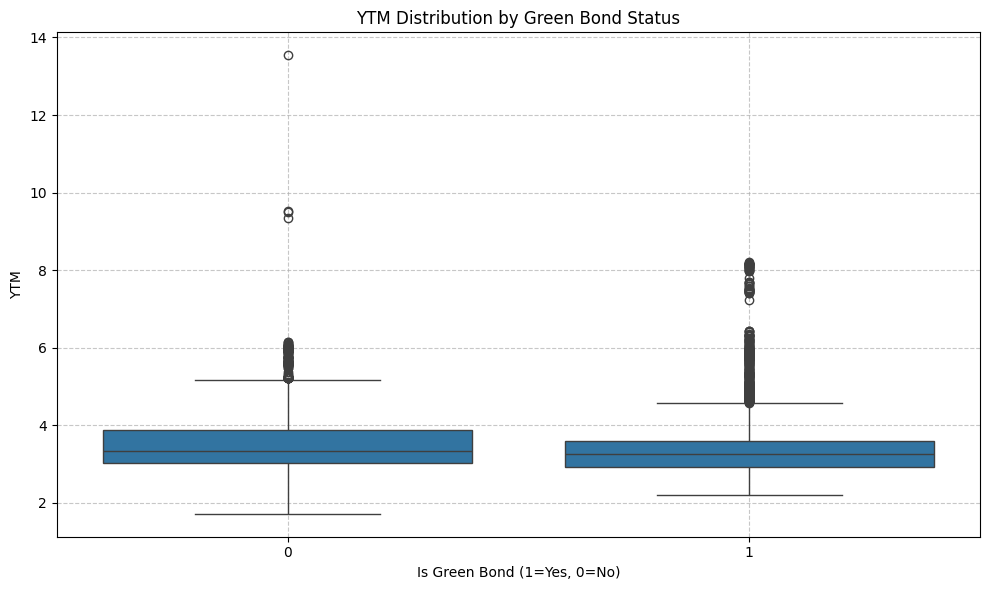

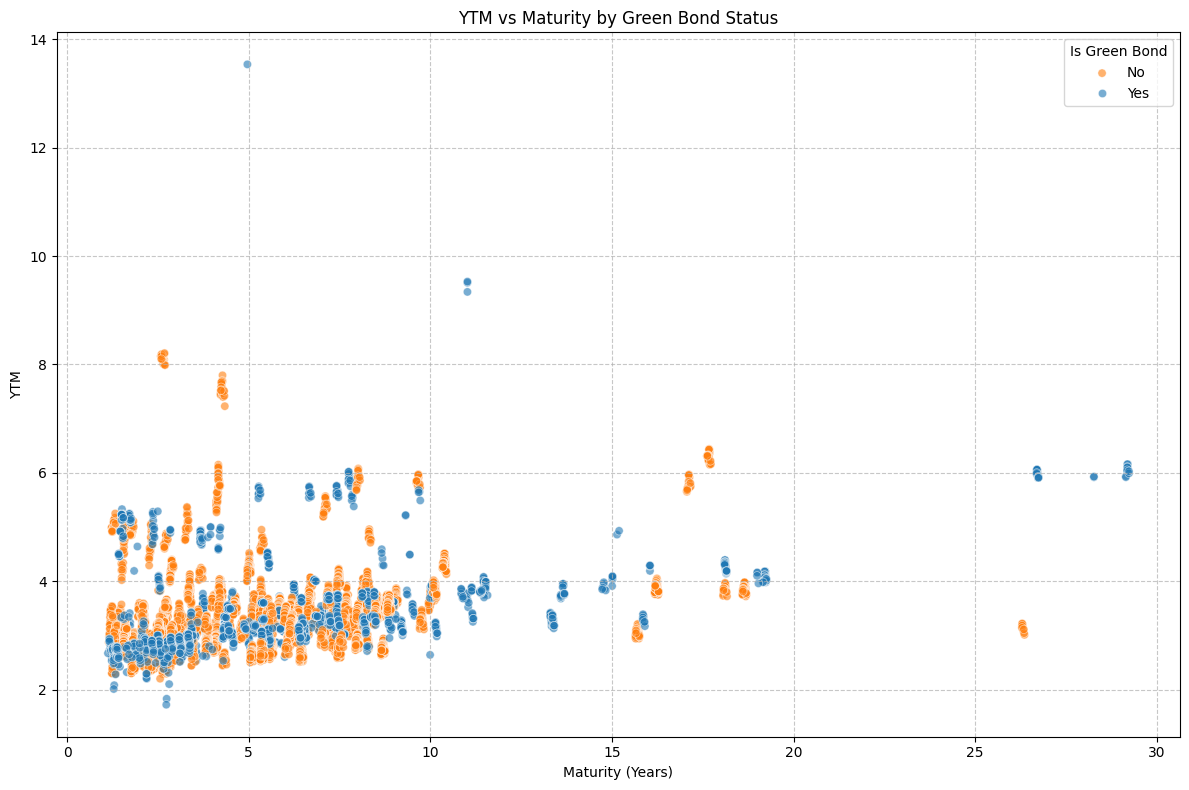


Correlation Matrix of Independent Variables:
                      is_green    Coupon  maturity_years  bond_age  \
is_green              1.000000 -0.115010       -0.151959  0.238330   
Coupon               -0.115010  1.000000        0.107648 -0.750636   
maturity_years       -0.151959  0.107648        1.000000 -0.094081   
bond_age              0.238330 -0.750636       -0.094081  1.000000   
Modified Duration    -0.055715 -0.037386        0.830212 -0.005810   
Emission_year_2020.0 -0.025426 -0.424347       -0.055035  0.689987   
Emission_year_2021.0  0.118252 -0.523119        0.038912  0.396840   
Emission_year_2022.0  0.224077  0.176230       -0.149271 -0.092441   
Emission_year_2023.0 -0.072125  0.536328        0.071690 -0.581433   
Emission_year_2024.0 -0.466553  0.136658        0.171528 -0.393858   
Emission_year_2025.0 -0.138524  0.042352        0.052409 -0.155514   

                      Modified Duration  Emission_year_2020.0  \
is_green                      -0.055715         

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


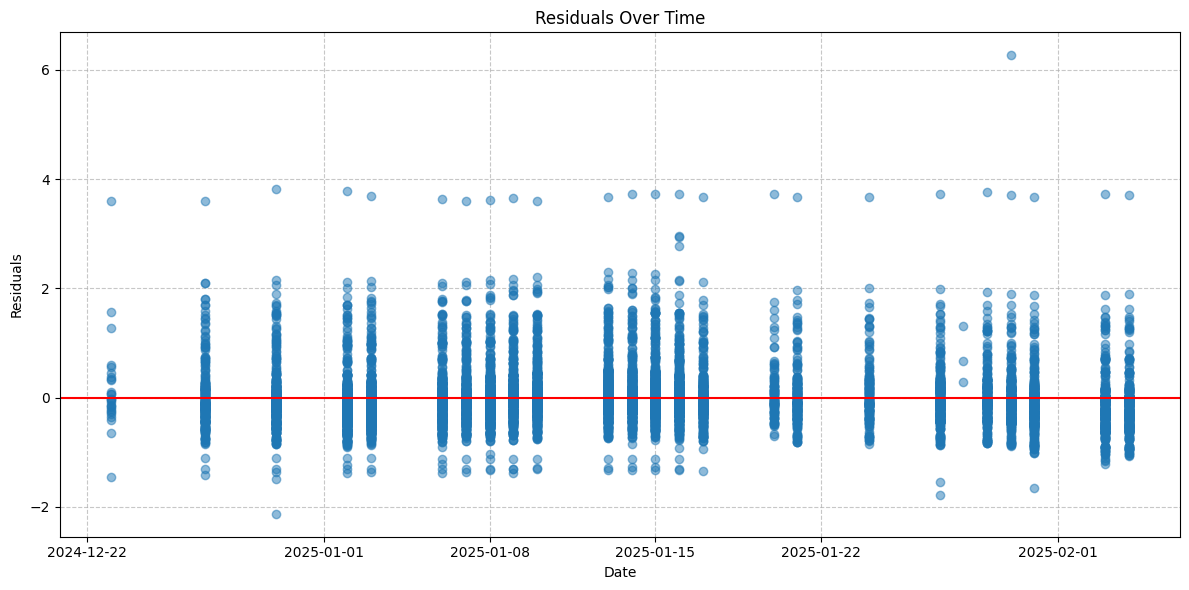


Suggested improvements and additional analyses:
1. Interaction terms: Consider interaction between is_green and maturity_years
2. Non-linear terms: Consider squared terms for maturity and duration
3. Industry effects: Control for industry (Branche) if available
4. Market conditions: Include market interest rates as control
5. Liquidity measures: Include trading volume (Volume in Euro) as proxy for liquidity
6. Credit rating: Include if available
7. Alternative serial correlation approaches: GARCH or ARIMA models
8. Robustness checks with different subsamples


In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.sandwich_covariance import cov_hac

def analyze_bond_ytm(df):
    # Data preprocessing
    # Create a copy to avoid modifying the original dataframe
    df_analysis = df.copy()

    # Explicitly convert columns to numeric, coercing errors to NaN
    numeric_columns = ['YTM', 'Coupon', 'Modified Duration', 'days_to_maturity']
    for col in numeric_columns:
        df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')

    # Convert is_green to numeric (1 for True, 0 for False)
    df_analysis['is_green'] = df_analysis['is_green'].astype(int)

    # Create maturity variable in years
    df_analysis['maturity_years'] = df_analysis['days_to_maturity'] / 365

    # Create bond age variable - ensure dates are properly parsed
    df_analysis['Date'] = pd.to_datetime(df_analysis['Date'])
    df_analysis['emission_datum'] = pd.to_datetime(df_analysis['emission_datum'])
    df_analysis['bond_age'] = (df_analysis['Date'] - df_analysis['emission_datum']).dt.days / 365

    # Identify emission year columns and ensure they're properly formatted
    emission_year_cols = [col for col in df_analysis.columns if 'Emission_year_' in col]
    for col in emission_year_cols:
        df_analysis[col] = df_analysis[col].astype(int)

    # Create a time variable for possible time trends
    df_analysis['time'] = df_analysis['Date'].astype(int) // 10**9

    # Define independent variables
    X_vars = ['is_green', 'Coupon', 'maturity_years', 'bond_age', 'Modified Duration'] + emission_year_cols

    # Remove NaN values
    df_clean = df_analysis.dropna(subset=['YTM'] + X_vars)

    # Print data info for debugging
    print(f"Shape after cleaning: {df_clean.shape}")
    print("\nData types of key variables:")
    print(df_clean[['YTM'] + X_vars].dtypes)

    # Check if we have enough data after cleaning
    if df_clean.shape[0] < 10:
        print("Warning: Not enough data points after cleaning. Please check your data.")
        return None

    # ------------------ Basic OLS Regression ------------------
    print("\nBasic OLS Regression")

    # Create the design matrix with a constant
    X = sm.add_constant(df_clean[X_vars])
    y = df_clean['YTM']

    # Fit the model
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

    # ------------------ OLS with Newey-West Standard Errors ------------------
    print("\nOLS with Newey-West Standard Errors (accounting for serial correlation)")

    # Fit with HAC standard errors
    results_nw = model.fit(cov_type='HAC', cov_kwds={'maxlags': 5})
    print(results_nw.summary())

    # ------------------ Clustered Standard Errors by Issuer ------------------
    print("\nOLS with Clustered Standard Errors by Issuer")

    try:
        # Create a panel dataset for the PanelOLS estimation
        panel_data = df_clean.copy()

        # Set multi-index for panel data (Issuer, Date)
        if 'Emittent' in panel_data.columns:
            panel_data = panel_data.set_index(['Emittent', 'Date'])

            # Create formulaic model string - handle special characters in column names
            formula = 'YTM ~ 1 + is_green + Coupon + maturity_years + bond_age + `Modified Duration`'
            for col in emission_year_cols:
                formula += f' + `{col}`'

            # Fit panel model with entity effects (issuer fixed effects) and clustered errors
            panel_model = PanelOLS.from_formula(
                formula=formula,
                data=panel_data,
                entity_effects=True
            )
            panel_results = panel_model.fit(cov_type='clustered', cluster_entity=True)
            print(panel_results)
        else:
            print("Column 'Emittent' not found. Skipping panel regression.")
    except Exception as e:
        print(f"Error in panel regression: {e}")
        print("Skipping panel regression.")

    # ------------------ Visualization ------------------
    try:
        # Plot YTM distribution by green vs non-green bonds
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='is_green', y='YTM', data=df_clean)
        plt.title('YTM Distribution by Green Bond Status')
        plt.xlabel('Is Green Bond (1=Yes, 0=No)')
        plt.ylabel('YTM')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Plot YTM vs Maturity colored by green status
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='maturity_years', y='YTM', hue='is_green', data=df_clean, alpha=0.6)
        plt.title('YTM vs Maturity by Green Bond Status')
        plt.xlabel('Maturity (Years)')
        plt.ylabel('YTM')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Is Green Bond', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in visualization: {e}")
        print("Skipping visualization.")

    # ------------------ Further Analysis ------------------
    # Check for multicollinearity
    try:
        correlation_matrix = df_clean[X_vars].corr()
        print("\nCorrelation Matrix of Independent Variables:")
        print(correlation_matrix)

        # Calculate VIF
        from statsmodels.stats.outliers_influence import variance_inflation_factor

        # VIF data frame
        vif_data = pd.DataFrame()
        vif_data["Variable"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        print("\nVariance Inflation Factors:")
        print(vif_data)
    except Exception as e:
        print(f"Error in multicollinearity analysis: {e}")
        print("Skipping multicollinearity analysis.")

    # Time series analysis of residuals
    try:
        residuals = results.resid

        plt.figure(figsize=(12, 6))
        plt.plot(df_clean['Date'].values, residuals, 'o', alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='-')
        plt.title('Residuals Over Time')
        plt.xlabel('Date')
        plt.ylabel('Residuals')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in residual analysis: {e}")
        print("Skipping residual analysis.")

    # ------------------ Additional Analysis Ideas ------------------
    print("\nSuggested improvements and additional analyses:")
    print("1. Interaction terms: Consider interaction between is_green and maturity_years")
    print("2. Non-linear terms: Consider squared terms for maturity and duration")
    print("3. Industry effects: Control for industry (Branche) if available")
    print("4. Market conditions: Include market interest rates as control")
    print("5. Liquidity measures: Include trading volume (Volume in Euro) as proxy for liquidity")
    print("6. Credit rating: Include if available")
    print("7. Alternative serial correlation approaches: GARCH or ARIMA models")
    print("8. Robustness checks with different subsamples")

    # Return results for further analysis if needed
    return {
        'ols_results': results,
        'newey_west_results': results_nw,
        'data': df_clean,
        'X_vars': X_vars
    }

# Example of implementation of suggested improvements:
def advanced_bond_analysis(df):
    # Start with the same preprocessing steps as in the main function
    df_analysis = df.copy()

    # Convert columns to numeric
    numeric_columns = ['YTM', 'Coupon', 'Modified Duration', 'days_to_maturity', 'Volume in Euro']
    for col in numeric_columns:
        if col in df_analysis.columns:
            df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')

    # Convert boolean to int
    df_analysis['is_green'] = df_analysis['is_green'].astype(int)

    # Create maturity variable in years
    df_analysis['maturity_years'] = df_analysis['days_to_maturity'] / 365

    # Create bond age variable
    df_analysis['Date'] = pd.to_datetime(df_analysis['Date'])
    df_analysis['emission_datum'] = pd.to_datetime(df_analysis['emission_datum'])
    df_analysis['bond_age'] = (df_analysis['Date'] - df_analysis['emission_datum']).dt.days / 365

    # Emission year dummies
    emission_year_cols = [col for col in df_analysis.columns if 'Emission_year_' in col]
    for col in emission_year_cols:
        df_analysis[col] = df_analysis[col].astype(int)

    # Add interaction terms
    df_analysis['green_maturity'] = df_analysis['is_green'] * df_analysis['maturity_years']
    df_analysis['green_duration'] = df_analysis['is_green'] * df_analysis['Modified Duration']

    # Add non-linear terms
    df_analysis['maturity_squared'] = df_analysis['maturity_years'] ** 2
    df_analysis['duration_squared'] = df_analysis['Modified Duration'] ** 2

    # Include industry fixed effects if available
    if 'Branche' in df_analysis.columns:
        industry_dummies = pd.get_dummies(df_analysis['Branche'], prefix='industry', drop_first=True)
        df_analysis = pd.concat([df_analysis, industry_dummies], axis=1)
        industry_cols = industry_dummies.columns.tolist()
    else:
        industry_cols = []

    # Include liquidity proxy
    if 'Volume in Euro' in df_analysis.columns:
        df_analysis['log_volume'] = np.log1p(df_analysis['Volume in Euro'])

    # Define enhanced independent variables
    enhanced_X_vars = [
        'is_green', 'Coupon', 'maturity_years', 'bond_age', 'Modified Duration',
        'green_maturity', 'green_duration', 'maturity_squared', 'duration_squared'
    ]

    # Add optional variables if available
    if 'log_volume' in df_analysis.columns:
        enhanced_X_vars.append('log_volume')

    # Add fixed effects
    enhanced_X_vars += emission_year_cols + industry_cols

    # Clean data
    df_clean = df_analysis.dropna(subset=['YTM'] + enhanced_X_vars)

    print(f"Shape after cleaning for advanced analysis: {df_clean.shape}")

    # Create the design matrix with a constant
    X = sm.add_constant(df_clean[enhanced_X_vars])
    y = df_clean['YTM']

    # Fit the model
    model = sm.OLS(y, X)
    results = model.fit()

    print("\nAdvanced OLS Regression with Interaction Terms and Non-linear Effects")
    print(results.summary())

    # Fit with Newey-West standard errors
    results_nw = model.fit(cov_type='HAC', cov_kwds={'maxlags': 5})
    print("\nAdvanced Model with Newey-West Standard Errors")
    print(results_nw.summary())

    return {
        'advanced_ols_results': results,
        'advanced_newey_west_results': results_nw,
        'data': df_clean,
        'X_vars': enhanced_X_vars
    }

# Run the basic analysis
results_dict = analyze_bond_ytm(df)

# Uncomment to run the advanced analysis
# advanced_results = advanced_bond_analysis(df)

# # To implement some of the suggested improvements:
# def advanced_bond_analysis(df):
#     # Data preprocessing (similar to above)
#     df_analysis = df.copy()
#     # ...preprocessing steps...
#
#     # Add interaction terms
#     df_analysis['green_maturity_interaction'] = df_analysis['is_green'] * df_analysis['maturity_years']
#
#     # Add non-linear terms
#     df_analysis['maturity_squared'] = df_analysis['maturity_years'] ** 2
#     df_analysis['duration_squared'] = df_analysis['Modified Duration'] ** 2
#
#     # Include industry fixed effects
#     industry_dummies = pd.get_dummies(df_analysis['Branche'], prefix='industry', drop_first=True)
#     df_analysis = pd.concat([df_analysis, industry_dummies], axis=1)
#
#     # Run enhanced regression
#     # ... similar to the code above but with additional variables
#     return results